# Predict Diabetes using with Machine Learnin

In [256]:
# Import Packages
import pandas as pd # Used to work with datasets

import numpy as np # Used to work with arrays

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.neighbors import KNeighborsClassifier #Classifier implementing the k-nearest neighbors vote

from sklearn.tree import DecisionTreeClassifier## is a class capable of performing multiclass classification on a dataset.
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier#Iteratively trains because at each time step the partial derivatives of the loss function with respect to the model parameters are computed. 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV

import sklearn 
from sklearn.preprocessing import StandardScaler## Removes the average and scales each feature/variable for unit variance. This process is carried out in an independent manner
from sklearn.model_selection import train_test_split #divide the data into training data and test data

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,classification_report


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

<h3>Data </h3>

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)

In [156]:
#read data
diabetes = pd.read_csv('data/diabetes.csv')


In [157]:
#name columns 
print(diabetes.columns) 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [158]:
diabetes.head() # Show part of the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [159]:
#shape data
print("dimension of data: {}".format(diabetes.shape))

dimension of data: (768, 9)


The diabetes dataset consists of 768 data points, with 9 features each:

In [160]:
## print about information  
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [161]:
#check is null data
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [162]:
## print describtion  
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


"outcome" Is the feature that I will expect, 0 means no diabetes, 1 means presence

In [163]:
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


500 is rated as 0 and 268 as 1:

In [168]:
# create datarame in Outcome =0 and Outcome=1
diabetes_0=diabetes[diabetes['Outcome']==0]
diabetes_1=diabetes[diabetes['Outcome']==1]

<AxesSubplot:xlabel='Outcome', ylabel='count'>

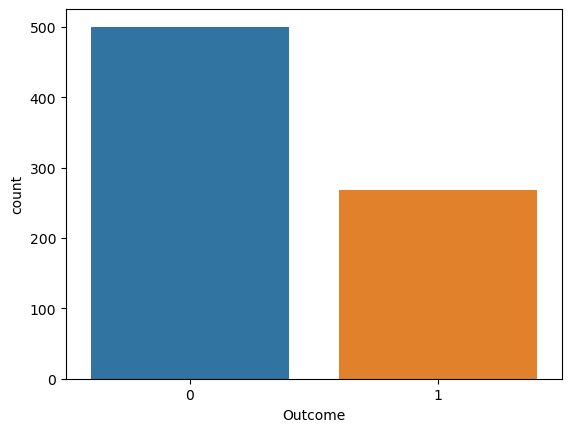

In [169]:
## The number of views in each categorical basket using bars.
sns.countplot(data= diabetes , x='Outcome',label="Count")


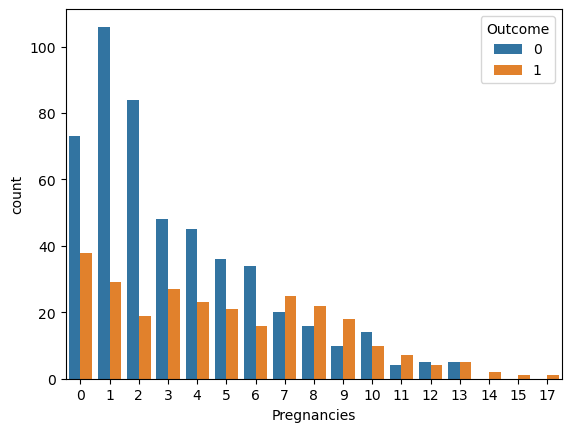

In [171]:
#visualization count plot Pregnancies
sns.countplot(data= diabetes , x='Pregnancies' , hue="Outcome")
plt.xlabel("Pregnancies")
plt.ylabel("count")
plt.show()

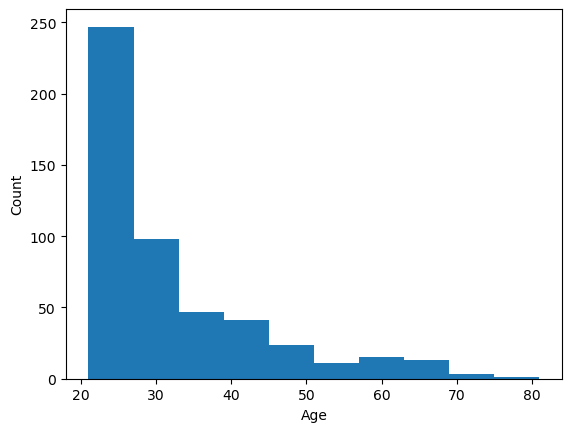

In [172]:
# histogram of the "Age" variable in the "Outcome=0" dataset 
plt.hist(diabetes_0["Age"] )
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

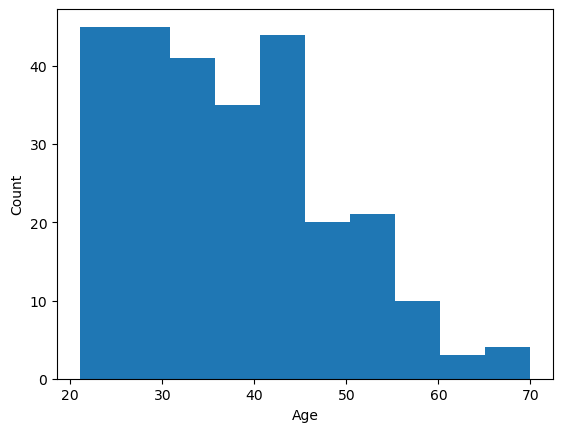

In [102]:
# histogram of the "Age" variable in the "Outcome=1" dataset 
plt.hist(diabetes_1["Age"])
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

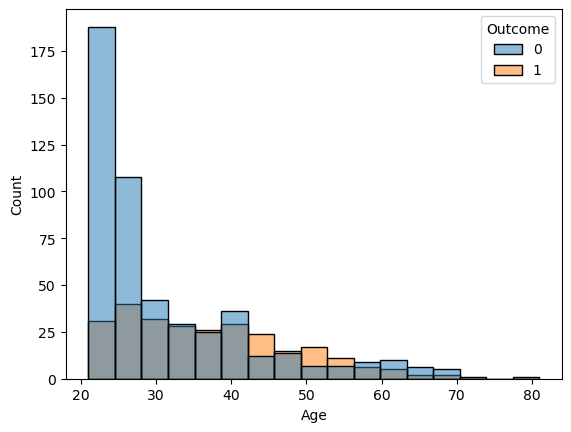

In [103]:
# histogram of the "Age"  
sns.histplot(data=diabetes, x='Age'  , hue='Outcome')
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [104]:
diabetes_0['Age'].mean()

31.19

In [105]:
diabetes_1['Age'].mean()

37.06716417910448

###### The incidence of diabetes increases from the age of 38

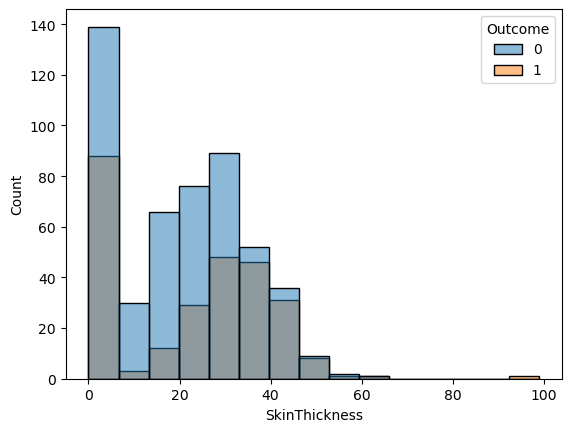

In [173]:
# histogram of the "SkinThickness"  

sns.histplot(data=diabetes, x='SkinThickness'  , hue='Outcome')
plt.xlabel("SkinThickness")
plt.ylabel("Count")
plt.show()

In [174]:
# average healthy people  SkinThickness 
diabetes_0['SkinThickness'].mean()


19.664

In [175]:
# max healthy people  SkinThickness 
diabetes_0['SkinThickness'].max()


60

In [176]:
# average diabetics  SkinThickness 

diabetes_1['SkinThickness'].mean()


22.16417910447761

In [177]:
# max diabetics  SkinThickness 
diabetes_1['SkinThickness'].max()


99

###### The thickness of the skin of diabetics is higher than that of healthy people

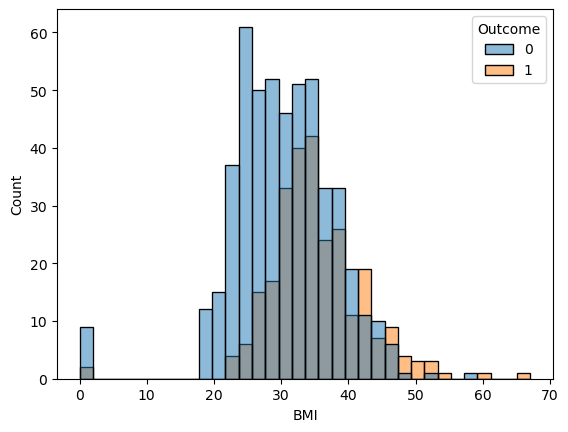

In [178]:
## histogram of the "BMi"  

sns.histplot(data=diabetes, x='BMI'  , hue='Outcome')
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

In [179]:
# average healthy people  BMI 

diabetes_0['BMI'].mean()


30.30419999999996

In [180]:
# max healthy people  BMI 

diabetes_0['BMI'].max()


57.3

In [181]:
# average healthy people  BMI 

diabetes_1['BMI'].mean()


35.14253731343278

In [182]:
# max healthy people  BMI 

diabetes_1['BMI'].max()


67.1

###### BMI is more common in affected patients than in healthy people.

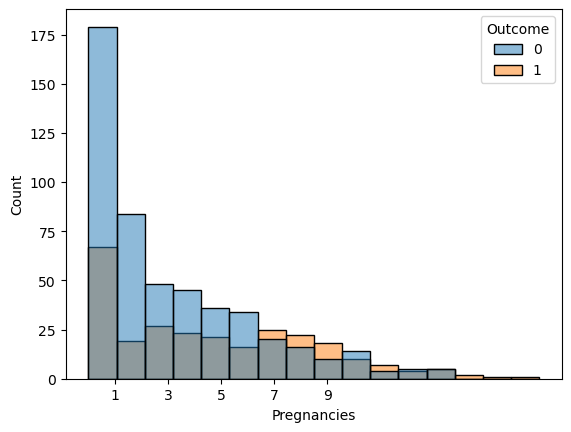

In [183]:
## histogram of the "Pregnancies"  

sns.histplot(data=diabetes, x='Pregnancies', hue='Outcome')
plt.xlabel("Pregnancies")
plt.ylabel("Count")
plt.xticks([1,3,5,7,9])
plt.show()

In [184]:
# average healthy people  Pregnancies 

diabetes_0['Pregnancies'].mean()


3.298

In [185]:
# max healthy people  Pregnancies 

diabetes_0['Pregnancies'].max()


13

In [186]:
# average healthy people  Pregnancies 

diabetes_1['Pregnancies'].mean()


4.865671641791045

In [187]:
# max healthy people  Pregnancies 

diabetes_1['Pregnancies'].max()


17

###### The Number of times pregnant of diabetics is higher than that of healthy people

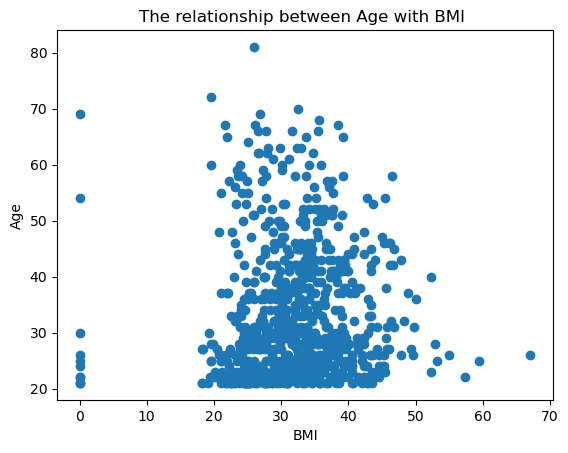

In [188]:
#scateer plot relationship between Age with BMI
plt.scatter (diabetes["BMI"] , diabetes["Age"] )
plt.title ("The relationship between Age with BMI ")
plt.xlabel ('BMI' )
plt.ylabel ('Age')
plt.show ()

In [189]:
#to compare  correlation between a target  and other features in absolute 
correlations = diabetes.corr()['Outcome'].drop('Outcome')
sorted_correlations = correlations.abs().sort_values(ascending=False)
sorted_correlations

Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

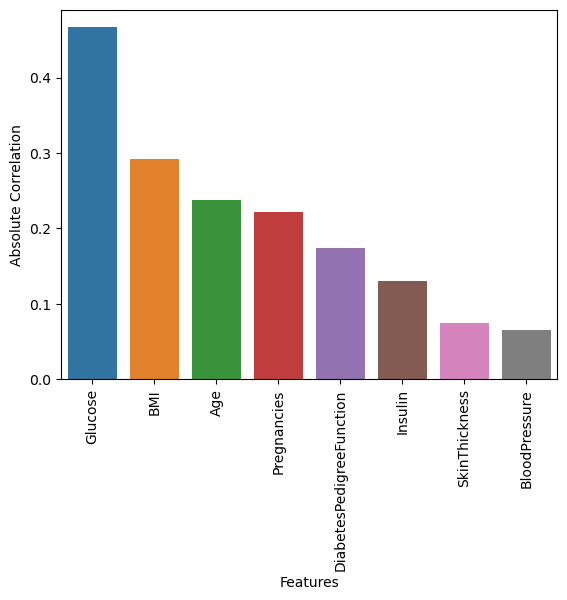

In [190]:
# show bar to compare correlation between a target and other features in absolute 
# to be organized and easy to compare

sns.barplot(x=sorted_correlations.index, y=sorted_correlations)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Absolute Correlation')
plt.show()

###### drop Outlier noise data

In [194]:

# Calculate the interquartile range (IQR) for each column
Q1 = diabetes.quantile(0.25)
Q3 = diabetes.quantile(0.75)
IQR = Q3 - Q1


# Identify  dataoutliers
outliers = diabetes[((diabetes < (Q1 - 1.5 * IQR)) | (diabetes > (Q3 + 1.5 * IQR))).any(axis=1)]

# drop  the outliers from the data
train_clean = diabetes.drop(outliers.index )

Text(0.5, 1.0, 'Correlation data ')

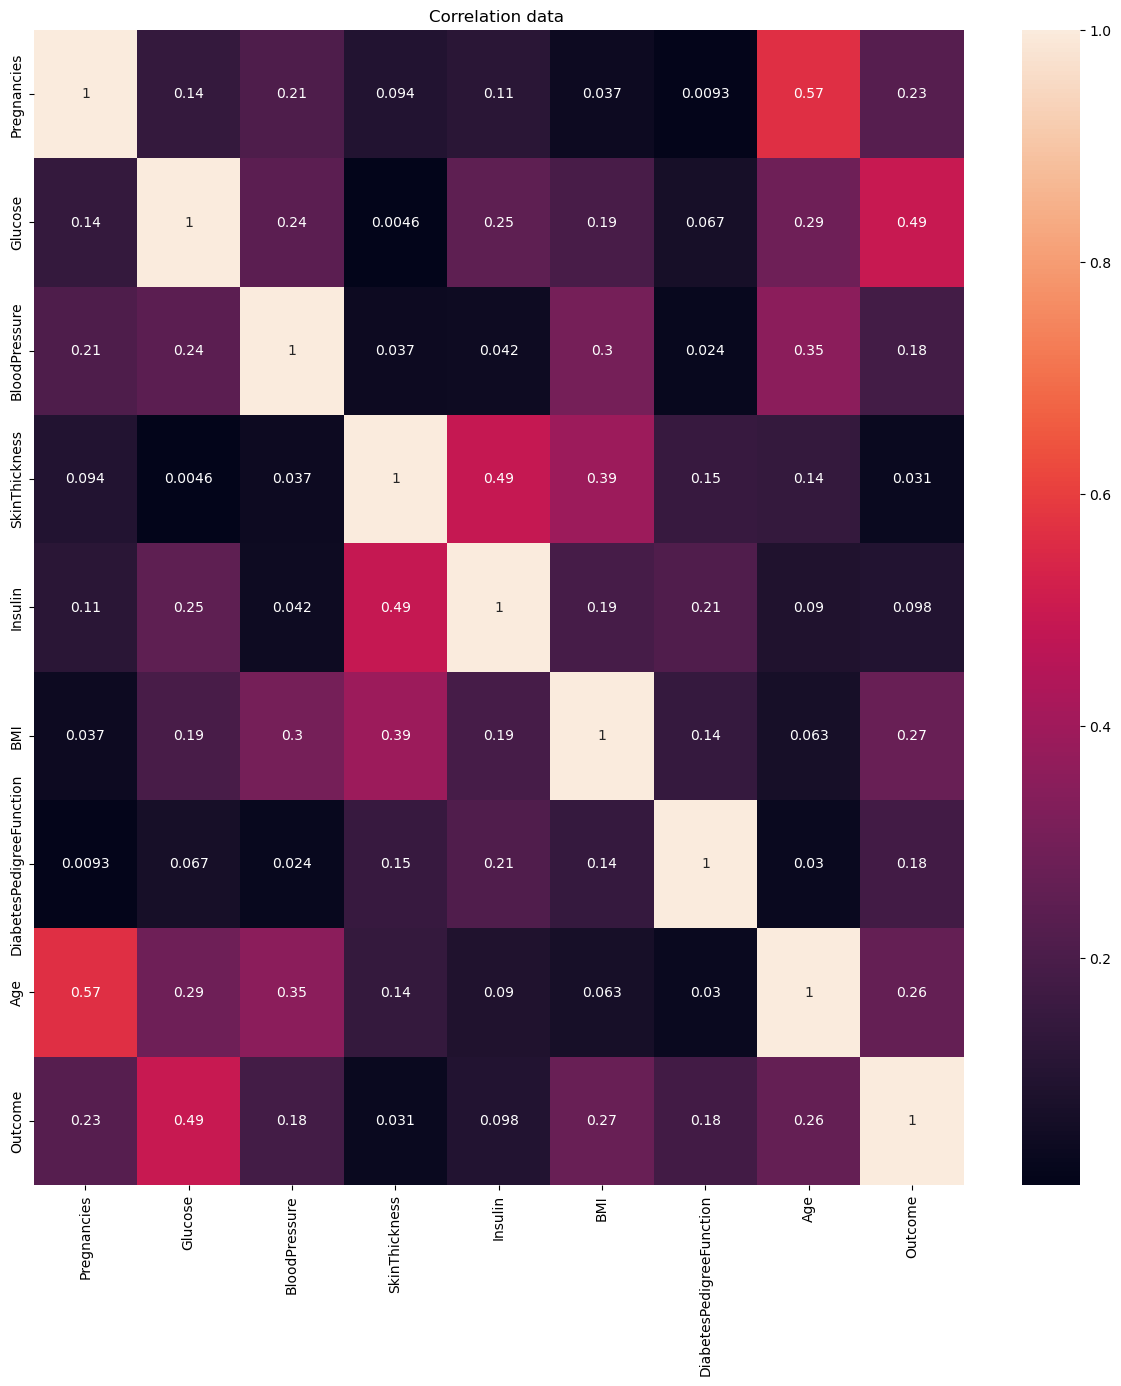

In [258]:
#visualizing the correlation between the variables in the diabetes 
plt.figure(figsize=(15,15))
sns.heatmap (np.abs(train_clean.corr()), annot = True  )
plt.title ("Correlation data " , fontsize = 12 )


In [259]:
#split data
X= train_clean.drop(columns=['Outcome']) # data
y=  train_clean['Outcome']  #target

In [260]:
#StandardScaler in dataframe mean=0 , Std=1
Stand = StandardScaler()
X = pd.DataFrame(Stand.fit_transform(X) , columns=X.columns)

In [307]:
# function evaluation 
def evaluate(model,X,target):
    """
    Evaluate the performance of the model
    
    Inputs:
     Model , 
     Data , 
     Target .     
     
     
    Outputs:
    Accuracy,
    Precision 
    Recall
    F1 Score
    AUC-ROC
    confusion matrix
    """
    
    #split the data into training and testing 
    X_train,X_test ,y_train , y_test=train_test_split(X , target ,test_size=0.25 )
    
    model.fit(X_train , y_train)  # fit model     
    
    y_pred=model.predict(X_test)
    
    
    print("model: ",model)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # F1 Score
    f1 = f1_score(y_test, y_pred)
    print("F1 Score:", f1)

    # AUC-ROC
    auc_roc = roc_auc_score(y_test, y_pred)
    print("AUC-ROC:", auc_roc)

    # Confusion Matrix
    confusion = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", confusion)

    report = classification_report(y_test, y_pred)
    print(report)


## K Nearest Neighbour predicted

It can be said that the Neighbors Nearest-k ,It is the simplest machine learning algorithm composed Build the model only from storing the training data set. To make a forecast for a new point in a group data, the algorithm finds the closest data points in the training data set

First, let's see if we can confirm the relationship between model complexity and accuracy:

In [198]:
#split data into train ,split
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=66)

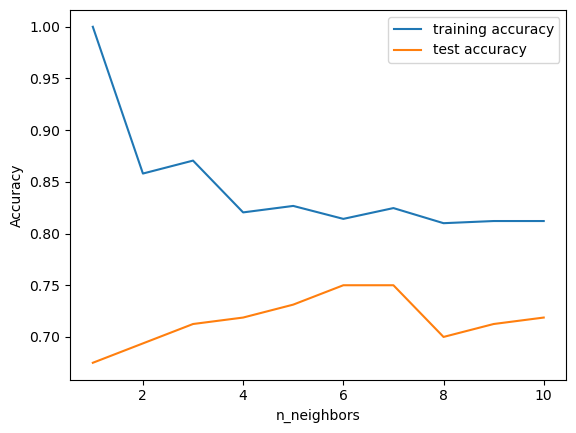

In [199]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # bulding nodel
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [308]:
## We check   accuracy of the k-nearest neighbors
evaluate(KNeighborsClassifier(n_neighbors=7), X,y)

model:  KNeighborsClassifier(n_neighbors=7)
Accuracy: 0.73125
Precision: 0.6666666666666666
Recall: 0.5423728813559322
F1 Score: 0.5981308411214954
AUC-ROC: 0.6919785198858869
Confusion Matrix:
 [[85 16]
 [27 32]]
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       101
           1       0.67      0.54      0.60        59

    accuracy                           0.73       160
   macro avg       0.71      0.69      0.70       160
weighted avg       0.72      0.73      0.72       160



## support vector machine

In [309]:
model=SVC()
model.fit(X_train , y_train)
y_pred=model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.75


In [310]:
param_grid = {'C': [0.1, 1, 10,100,1000,10000], 'gamma': [0.0001,0.001,0.01, 0.1, 1,10,100,1000]}

# Create an instance of the model
model = SVC()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2)

# Fit the GridSearchCV 
grid_search.fit(X_train, y_train)

# Get the best parameter 
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Evaluate the model with the best parameters 
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)

# Print the results
print("Best Parameters: ", best_params)
print("Best Accuracy: ", best_accuracy)
print("Test Accuracy: ", test_accuracy)

Best Parameters:  {'C': 100, 'gamma': 0.0001}
Best Accuracy:  0.7850244072524407
Test Accuracy:  0.76875


In [311]:
evaluate(grid_search,X,y)

model:  GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]})
Accuracy: 0.75
Precision: 0.7647058823529411
Recall: 0.4482758620689655
F1 Score: 0.5652173913043479
AUC-ROC: 0.684922244759973
Confusion Matrix:
 [[94  8]
 [32 26]]
              precision    recall  f1-score   support

           0       0.75      0.92      0.82       102
           1       0.76      0.45      0.57        58

    accuracy                           0.75       160
   macro avg       0.76      0.68      0.69       160
weighted avg       0.75      0.75      0.73       160



## Decision tree classifier

In [312]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train))) # To calculate the accuracy of the training data
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))   # To calculate the accuracy of the test data

Accuracy on training set: 1.000
Accuracy on test set: 0.681


The accuracy on the training set using the decision tree classifier is 100

While the accuracy of the test set is much worse. This is an indication that the tree is suffering from over-adjustment


overfitting , It does not generalize well to new data. Therefore, we need to apply pre-pruning
  on the tree

Now I will do it again by setting
3 = depth_m
Which reduces the depth of the tree.
This leads to a lower accuracy in the training set, but improves the test set. 

In [313]:
## We check   accuracy of the  Decision tree classifier algorithm for predicting diabetes
model_tree= DecisionTreeClassifier(criterion="entropy", max_depth = 3,ccp_alpha=2,min_samples_split=5)
evaluate(model_tree, X,y)

model:  DecisionTreeClassifier(ccp_alpha=2, criterion='entropy', max_depth=3,
                       min_samples_split=5)
Accuracy: 0.7375
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC: 0.5
Confusion Matrix:
 [[118   0]
 [ 42   0]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       118
           1       0.00      0.00      0.00        42

    accuracy                           0.74       160
   macro avg       0.37      0.50      0.42       160
weighted avg       0.54      0.74      0.63       160



In [314]:
param_grid = {'max_depth': [2,3,4,5,6,7,8,9,10,11,12], 'ccp_alpha': [2,3,4,5,6,7,8,9], 'min_samples_split':[2,3,4,5,6,7,8,9]}

# Create an instance of the model
model = DecisionTreeClassifier()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2)

# Fit the GridSearchCV 
grid_search.fit(X_train, y_train)

# Get the best parameter 
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Evaluate the model with the best parameters 
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)

# Print the results
print("Best Parameters: ", best_params)
print("Best Accuracy: ", best_accuracy)
print("Test Accuracy: ", test_accuracy)

Best Parameters:  {'ccp_alpha': 2, 'max_depth': 2, 'min_samples_split': 2}
Best Accuracy:  0.6826708507670851
Test Accuracy:  0.7


## LogisticRegression for predicting diabetes

In [315]:
logistic=LogisticRegression(   max_iter=100 )
logistic.fit(X_train , y_train )
print("Accuracy on training set: {:.2f}".format(logistic.score(X_train,y_train))) # To calculate the accuracy of the training data
print("Accuracy on test set: {:.2f}".format(logistic.score(X_test,y_test))) # To calculate the accuracy of the testing data

Accuracy on training set: 0.79
Accuracy on test set: 0.75


In [316]:
## We check   accuracy of the Logistic Regression   algorithm for predicting diabetes
evaluate(LogisticRegression(), X,y)

model:  LogisticRegression()
Accuracy: 0.775
Precision: 0.65
Recall: 0.5416666666666666
F1 Score: 0.5909090909090908
AUC-ROC: 0.7083333333333333
Confusion Matrix:
 [[98 14]
 [22 26]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.84       112
           1       0.65      0.54      0.59        48

    accuracy                           0.78       160
   macro avg       0.73      0.71      0.72       160
weighted avg       0.77      0.78      0.77       160



## Neural networks for predicting diabetes

In [317]:
mlp = MLPClassifier(max_iter=100, alpha=0.001,   random_state=0)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format( mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test,y_test)))


Accuracy on training set: 0.810
Accuracy on test set: 0.750


In [318]:
## We check   accuracy of the  MLP Classi fier algorithm for predicting diabetes
evaluate(MLPClassifier(max_iter=100, alpha=1), X,y)

model:  MLPClassifier(alpha=1, max_iter=100)
Accuracy: 0.80625
Precision: 0.7222222222222222
Recall: 0.5531914893617021
F1 Score: 0.6265060240963856
AUC-ROC: 0.7323479570702316
Confusion Matrix:
 [[103  10]
 [ 21  26]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       113
           1       0.72      0.55      0.63        47

    accuracy                           0.81       160
   macro avg       0.78      0.73      0.75       160
weighted avg       0.80      0.81      0.80       160



Our model so far is the default neural network model after measurement. Now I will draw a heat map of the weights of the first layer of the learned neural network in order to predict diabetes using the dataset.

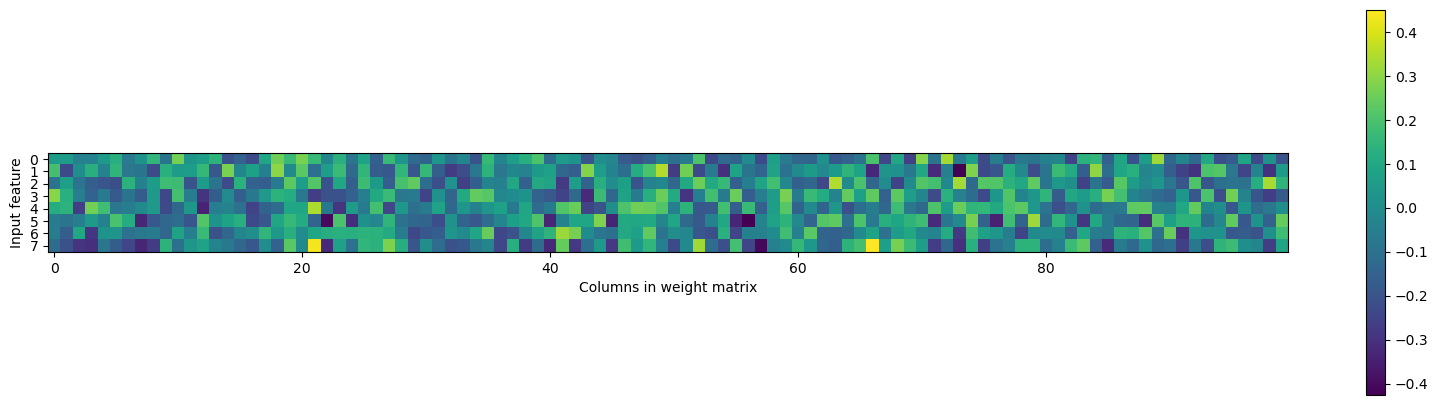

In [319]:
plt.figure(figsize=(20, 5)) # 
plt.imshow(mlp.coefs_[0])
plt.yticks(range(8)) 
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()
plt.show()